# Instructions

Вам выдано 2 датасета: 
- P04_TRAIN.pq (train)
- P04_TEST.pq (test)

Вам необходимо обучить модель на данных из **train**, и проскорить датасет **test**.

Это задача на *бинарную* классификацию, с *дисбалансированными* классами.
Вам доступны *любые* библиотеки и инструменты, которые есть на python.

**<span style='color:red'> !!! </span>** Так же необходимо оформлять ноутбук и стараться комментировать коды в каждом этапе решения задачи **<span style='color:red'> !!! </span>**

После скоринга, вам необходимо отправить проскоренный .csv файл в формате, и ноутбук с решением (можно и ссылку в collab):
**[ID, predicted]**


# Начало проекта

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
df_train = pd.read_parquet('P04_TRAIN.pq')
df_test  = pd.read_parquet('P04_TEST.pq')

In [42]:
df_train

,ID,TARGET,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,FEATURE_8,...,FEATURE_405,FEATURE_406,FEATURE_407,FEATURE_408,FEATURE_409,FEATURE_410,FEATURE_411,FEATURE_412,FEATURE_413,FEATURE_414
0,1-33725273547,0,0.604733,0.303755,0.001755,0.291645,0.101433,4.995094,0.0,0.000000,...,NaN,NaN,NaN,NaN,-1.0,-1.0,None,-1.0,NaN,NaN
1,1-33165158948,0,0.730506,4.031284,0.000106,2.883802,0.485855,0.000000,0.0,0.000000,...,NaN,NaN,NaN,NaN,-1.0,-1.0,None,-1.0,NaN,NaN
2,1-33270455953,0,0.000032,0.774739,0.000010,7.657499,0.138511,4.102084,0.0,1.285695,...,NaN,NaN,560.321126,560.211151,-1.0,-1.0,None,-1.0,NaN,NaN
3,1-32934335615,0,1.647914,5.325781,0.001407,6.557573,0.376410,15.120202,0.0,0.000000,...,NaN,NaN,NaN,NaN,-1.0,-1.0,None,-1.0,NaN,NaN
4,1-34112605832,0,3.891732,4.414761,0.080974,3.016513,1.943187,2.387400,0.0,0.000000,...,NaN,NaN,726.932805,726.932805,-1.0,-1.0,None,-1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20133,1-33194268837,0,0.000000,4.755190,0.000000,0.348208,0.198604,3.159066,0.0,0.127652,...,NaN,NaN,854.613439,854.613439,-1.0,-1.0,None,-1.0,NaN,NaN
20134,1-33493779388,0,0.326693,6.469571,0.032283,23.842242,6.409096,1.856867,0.0,0.000000,...,NaN,NaN,0.000000,0.000000,-1.0,-1.0,None,-1.0,NaN,NaN
20135,1-34046404092,0,0.349497,0.764158,0.000229,5.766869,0.070918,2.970987,0.0,0.000000,...,NaN,NaN,NaN,NaN,-1.0,-1.0,None,-1.0,NaN,NaN
20136,1-34345700658,0,0.091942,0.187871,0.000000,3.402073,0.852378,1.379387,0.0,0.000000,...,NaN,NaN,NaN,NaN,-1.0,-1.0,None,-1.0,NaN,NaN


#### deleting duplicates

In [43]:
df_train.drop_duplicates(inplace=True)
df_train

,ID,TARGET,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,FEATURE_8,...,FEATURE_405,FEATURE_406,FEATURE_407,FEATURE_408,FEATURE_409,FEATURE_410,FEATURE_411,FEATURE_412,FEATURE_413,FEATURE_414
0,1-33725273547,0,0.604733,0.303755,0.001755,0.291645,0.101433,4.995094,0.0,0.000000,...,NaN,NaN,NaN,NaN,-1.0,-1.0,None,-1.0,NaN,NaN
1,1-33165158948,0,0.730506,4.031284,0.000106,2.883802,0.485855,0.000000,0.0,0.000000,...,NaN,NaN,NaN,NaN,-1.0,-1.0,None,-1.0,NaN,NaN
2,1-33270455953,0,0.000032,0.774739,0.000010,7.657499,0.138511,4.102084,0.0,1.285695,...,NaN,NaN,560.321126,560.211151,-1.0,-1.0,None,-1.0,NaN,NaN
3,1-32934335615,0,1.647914,5.325781,0.001407,6.557573,0.376410,15.120202,0.0,0.000000,...,NaN,NaN,NaN,NaN,-1.0,-1.0,None,-1.0,NaN,NaN
4,1-34112605832,0,3.891732,4.414761,0.080974,3.016513,1.943187,2.387400,0.0,0.000000,...,NaN,NaN,726.932805,726.932805,-1.0,-1.0,None,-1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20133,1-33194268837,0,0.000000,4.755190,0.000000,0.348208,0.198604,3.159066,0.0,0.127652,...,NaN,NaN,854.613439,854.613439,-1.0,-1.0,None,-1.0,NaN,NaN
20134,1-33493779388,0,0.326693,6.469571,0.032283,23.842242,6.409096,1.856867,0.0,0.000000,...,NaN,NaN,0.000000,0.000000,-1.0,-1.0,None,-1.0,NaN,NaN
20135,1-34046404092,0,0.349497,0.764158,0.000229,5.766869,0.070918,2.970987,0.0,0.000000,...,NaN,NaN,NaN,NaN,-1.0,-1.0,None,-1.0,NaN,NaN
20136,1-34345700658,0,0.091942,0.187871,0.000000,3.402073,0.852378,1.379387,0.0,0.000000,...,NaN,NaN,NaN,NaN,-1.0,-1.0,None,-1.0,NaN,NaN


In [44]:
df_train.columns

Index(['ID', 'TARGET', 'FEATURE_1', 'FEATURE_2', 'FEATURE_3', 'FEATURE_4',
       'FEATURE_5', 'FEATURE_6', 'FEATURE_7', 'FEATURE_8',
       ...
       'FEATURE_405', 'FEATURE_406', 'FEATURE_407', 'FEATURE_408',
       'FEATURE_409', 'FEATURE_410', 'FEATURE_411', 'FEATURE_412',
       'FEATURE_413', 'FEATURE_414'],
      dtype='object', length=416)

### saving features which are numeric, and min value is not -1 (might be unaccurate data since the range is -1, to 1000 usually), deleting features with small diversity < 3 values

In [45]:
features = []
for col in df_train.columns:
    if col == 'ID':
        continue
    if not pd.to_numeric(df_train[col], errors='coerce').notnull().all():
        continue
    if df_train[col].isnull().values.any():
        continue
#     if len(df_train[col].value_counts()) < 50:
#         continue
    if df_train[col].min() == -1:
        if df_train[col].max() == -1:
            continue
        continue
    features.append(col)
# features.append('TARGET')
len(features)

158

In [81]:
# for col in features:
#     print(f"{col}: ",df_train[col].min(), df_train[col].max())

In [46]:
df_train[features]

,TARGET,FEATURE_9,FEATURE_13,FEATURE_14,FEATURE_15,FEATURE_16,FEATURE_20,FEATURE_21,FEATURE_25,FEATURE_29,...,FEATURE_351,FEATURE_352,FEATURE_354,FEATURE_355,FEATURE_361,FEATURE_376,FEATURE_385,FEATURE_386,FEATURE_387,FEATURE_388
0,0,0.0,0.000000,34.482759,0.000000,4.803589,6.307047,8.683420,100000,0,...,0.000000,0.000000,0,0,0,0.245146,15.698587,10.652117,18.243325,0
1,0,250.0,0.000000,17.241379,0.000000,1.754991,13.092932,2.535155,100000,0,...,0.000000,0.000000,0,0,0,14.216815,24.332810,27.539621,26.338045,0
2,0,0.0,0.000000,34.482759,0.000000,0.481367,45.849736,2.576910,100000,1,...,0.000000,0.000000,0,0,0,2.379268,18.838305,23.122889,17.397608,0
3,0,0.0,0.000000,0.000000,0.000000,0.000000,2.504512,1.565322,100000,1,...,0.000000,0.000000,0,0,0,1.257990,68.288854,42.868277,33.224598,0
4,0,0.0,0.000000,0.000000,0.000000,0.000000,4.032759,5.981764,100000,1,...,0.000000,0.000000,0,0,0,3.946150,35.321821,39.490777,31.170714,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20133,0,0.0,0.000000,0.000000,0.000000,0.000000,21.613250,4.429195,100000,0,...,0.000000,0.000000,0,0,0,0.000000,3.924647,5.975578,4.711852,0
20134,0,0.0,0.000000,0.000000,0.000000,0.000000,0.847690,1.515698,100000,1,...,0.000000,0.000000,0,0,0,2.926598,40.816327,44.427124,42.406669,0
20135,0,0.0,76.923077,17.241379,2.644093,0.254216,6.161502,5.353650,100000,1,...,15.773333,15.773333,0,0,0,3.970384,16.483516,10.392310,12.323306,0
20136,0,0.0,0.000000,0.000000,0.000000,0.000000,0.789363,1.411408,100000,1,...,0.026667,0.026667,0,0,0,0.810501,7.849294,17.666926,15.343724,0


In [47]:
# X = scaler.fit_transform(df_train[features])
X = df_train[features]

In [48]:
y = df_train['TARGET']

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.4, random_state=8)

In [50]:
features.remove('TARGET')

In [51]:
len(X_train)

9653

In [57]:
zeros = X_train[X_train['TARGET'] == 0]
ones = X_train[X_train['TARGET'] == 1]

GROUP_SIZE = 200
    
df_groups = [zeros[i:i + GROUP_SIZE] for i in range(0, len(zeros), GROUP_SIZE)] 

In [58]:
len(df_groups)

48

In [59]:
import xgboost as xgb

estimators = []
for zer in df_groups:
    df = pd.concat([zer, ones])
    clf = xgb.XGBClassifier(objective='binary:logistic', n_estimators=50)
    clf.fit(df[features], df['TARGET'])
    estimators.append(clf)
    
def decision(x):
    return np.sum(x)==54
    
class MyBaggingClassifier:
    def __init__(self, classifiers):
        self.classifiers = classifiers
        
    def predict(self, X):
        # Make predictions using all the base classifiers
        predictions = [classifier.predict(X) for classifier in self.classifiers]
        # Aggregate predictions using majority voting
        majority_votes = np.apply_along_axis(decision, axis=0, arr=predictions)
 
        return majority_votes

model = MyBaggingClassifier(classifiers=estimators)

In [60]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test[features])

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3999
           1       0.00      0.00      0.00        24

    accuracy                           0.99      4023
   macro avg       0.50      0.50      0.50      4023
weighted avg       0.99      0.99      0.99      4023



/Users/dimmyt/Documents/PyCharmProjects/N--DS/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dimmyt/Documents/PyCharmProjects/N--DS/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dimmyt/Documents/PyCharmProjects/N--DS/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [61]:
stacking_estimators = []
for index, clf in enumerate(estimators):
    stacking_estimators.append((f'feat {index}', clf))
stacking_estimators

[('feat 0',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=50, n_jobs=None, num_parallel_tree=None,
                predictor=None, random_state=None, ...)),
 ('feat 1',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
        

In [62]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier

final_estimator = GradientBoostingClassifier(n_estimators=100, learning_rate=.5,random_state=8)

clf = StackingClassifier(estimators=stacking_estimators, final_estimator=final_estimator)
clf.fit(X_validation[features], y_validation)

StackingClassifier(estimators=[('feat 0',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learnin...
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=50, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=None, ...)), ...],
                   final_estimator=GradientBoostingClassifier(learning_rate=0.5,
                                                              random_state=8))

In [63]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test[features])

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3999
           1       0.60      0.12      0.21        24

    accuracy                           0.99      4023
   macro avg       0.80      0.56      0.60      4023
weighted avg       0.99      0.99      0.99      4023



### Bagging with inside XGB max_features=60

In [127]:
from sklearn.metrics import classification_report

y_true_pred = clf.predict(X_test)

print(classification_report(y_test, y_true_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3999
           1       0.93      0.58      0.72        24

    accuracy                           1.00      4023
   macro avg       0.97      0.79      0.86      4023
weighted avg       1.00      1.00      1.00      4023



### without columns with -1, deleting features with < 50 different values

In [23]:
from sklearn.metrics import classification_report

y_true_pred = clf.predict(X_test)

print(classification_report(y_test, y_true_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3999
           1       0.88      0.62      0.73        24

    accuracy                           1.00      4023
   macro avg       0.94      0.81      0.87      4023
weighted avg       1.00      1.00      1.00      4023



### without columns with -1, deleting features with < 100 different values

In [36]:
from sklearn.metrics import classification_report

y_true_pred = clf.predict(X_test)

print(classification_report(y_test, y_true_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3999
           1       0.89      0.67      0.76        24

    accuracy                           1.00      4023
   macro avg       0.94      0.83      0.88      4023
weighted avg       1.00      1.00      1.00      4023



In [38]:
from sklearn.metrics import f1_score

f1_score(y_test, y_true_pred, average=None)

array([0.99875062, 0.76190476])

In [97]:
def features_score(new_features_list):
    X = df_train[new_features_list]
    Y = df_train['TARGET']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)
    
    clf = xgb.XGBClassifier(objective='binary:logistic')
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    return f1_score(y_test, y_pred, average='macro')

new_features_list = features
before = features_score(features)

for feature in features:
    new_features_list.remove(feature)
    
    current_score = features_score(new_features_list)
    if current_score >= before:
        before = current_score
    else:
        new_features_list.append(feature)
        
new_features_list

['FEATURE_13',
 'FEATURE_15',
 'FEATURE_20',
 'FEATURE_30',
 'FEATURE_35',
 'FEATURE_37',
 'FEATURE_39',
 'FEATURE_47',
 'FEATURE_52',
 'FEATURE_64',
 'FEATURE_66',
 'FEATURE_68',
 'FEATURE_71',
 'FEATURE_75',
 'FEATURE_77',
 'FEATURE_79',
 'FEATURE_92',
 'FEATURE_94',
 'FEATURE_96',
 'FEATURE_98',
 'FEATURE_100',
 'FEATURE_102',
 'FEATURE_116',
 'FEATURE_118',
 'FEATURE_120',
 'FEATURE_123',
 'FEATURE_125',
 'FEATURE_127',
 'FEATURE_130',
 'FEATURE_133',
 'FEATURE_135',
 'FEATURE_137',
 'FEATURE_139',
 'FEATURE_153',
 'FEATURE_155',
 'FEATURE_157',
 'FEATURE_159',
 'FEATURE_161',
 'FEATURE_163',
 'FEATURE_165',
 'FEATURE_167',
 'FEATURE_169',
 'FEATURE_171',
 'FEATURE_173',
 'FEATURE_175',
 'FEATURE_177',
 'FEATURE_179',
 'FEATURE_181',
 'FEATURE_183',
 'FEATURE_185',
 'FEATURE_187',
 'FEATURE_189',
 'FEATURE_192',
 'FEATURE_194',
 'FEATURE_196',
 'FEATURE_198',
 'FEATURE_200',
 'FEATURE_202',
 'FEATURE_204',
 'FEATURE_206',
 'FEATURE_208',
 'FEATURE_213',
 'FEATURE_215',
 'FEATURE_21

In [98]:
print(len(new_features_list), before)

130 0.9085910340596669


In [74]:
print(len(new_features_list), before)

118 0.9085910340596669


In [99]:
uni = set(['FEATURE_16',
 'FEATURE_21',
 'FEATURE_34',
 'FEATURE_38',
 'FEATURE_48',
 'FEATURE_63',
 'FEATURE_65',
 'FEATURE_68',
 'FEATURE_71',
 'FEATURE_75',
 'FEATURE_77',
 'FEATURE_79',
 'FEATURE_93',
 'FEATURE_96',
 'FEATURE_98',
 'FEATURE_102',
 'FEATURE_116',
 'FEATURE_118',
 'FEATURE_120',
 'FEATURE_123',
 'FEATURE_125',
 'FEATURE_127',
 'FEATURE_130',
 'FEATURE_133',
 'FEATURE_136',
 'FEATURE_138',
 'FEATURE_153',
 'FEATURE_155',
 'FEATURE_158',
 'FEATURE_161',
 'FEATURE_163',
 'FEATURE_167',
 'FEATURE_169',
 'FEATURE_171',
 'FEATURE_173',
 'FEATURE_175',
 'FEATURE_177',
 'FEATURE_179',
 'FEATURE_181',
 'FEATURE_183',
 'FEATURE_186',
 'FEATURE_188',
 'FEATURE_190',
 'FEATURE_193',
 'FEATURE_195',
 'FEATURE_197',
 'FEATURE_199',
 'FEATURE_201',
 'FEATURE_203',
 'FEATURE_205',
 'FEATURE_207',
 'FEATURE_214',
 'FEATURE_216',
 'FEATURE_218',
 'FEATURE_221',
 'FEATURE_227',
 'FEATURE_229',
 'FEATURE_234',
 'FEATURE_236',
 'FEATURE_238',
 'FEATURE_240',
 'FEATURE_246',
 'FEATURE_256',
 'FEATURE_258',
 'FEATURE_260',
 'FEATURE_262',
 'FEATURE_266',
 'FEATURE_268',
 'FEATURE_272',
 'FEATURE_277',
 'FEATURE_279',
 'FEATURE_281',
 'FEATURE_293',
 'FEATURE_338',
 'FEATURE_348',
 'FEATURE_351',
 'FEATURE_353',
 'FEATURE_385',
 'FEATURE_387',
 'FEATURE_20',
 'FEATURE_37',
 'FEATURE_74',
 'FEATURE_117',
 'FEATURE_135',
 'FEATURE_140',
 'FEATURE_160',
 'FEATURE_168',
 'FEATURE_176',
 'FEATURE_182',
 'FEATURE_192',
 'FEATURE_202',
 'FEATURE_208',
 'FEATURE_217',
 'FEATURE_241',
 'FEATURE_263',
 'FEATURE_276',
 'FEATURE_285',
 'FEATURE_376',
 'FEATURE_412',
 'FEATURE_52',
 'FEATURE_131',
 'FEATURE_156',
 'FEATURE_174',
 'FEATURE_184',
 'FEATURE_206',
 'FEATURE_219',
 'FEATURE_271',
 'FEATURE_352',
 'FEATURE_30',
 'FEATURE_137',
 'FEATURE_178',
 'FEATURE_215',
 'FEATURE_280',
 'FEATURE_92',
 'FEATURE_198',
 'FEATURE_386',
 'FEATURE_257',
 'FEATURE_162']) & set(new_features_list)

len(uni)

92

In [103]:
X = df_train[new_features_list]
Y = df_train['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

clf = xgb.XGBClassifier(objective='binary:logistic')
clf.fit(X_train, y_train)
    
from sklearn.metrics import classification_report

y_true_pred = clf.predict(X_test)

print(classification_report(y_test, y_true_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3999
           1       0.90      0.75      0.82        24

    accuracy                           1.00      4023
   macro avg       0.95      0.87      0.91      4023
weighted avg       1.00      1.00      1.00      4023



In [75]:
X = df_train[new_features_list]
Y = df_train['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

clf = xgb.XGBClassifier(objective='binary:logistic')
clf.fit(X_train, y_train)
    
from sklearn.metrics import classification_report

y_true_pred = clf.predict(X_test)

print(classification_report(y_test, y_true_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3999
           1       0.90      0.75      0.82        24

    accuracy                           1.00      4023
   macro avg       0.95      0.87      0.91      4023
weighted avg       1.00      1.00      1.00      4023



### important features list save

In [104]:
features = ['FEATURE_16',
 'FEATURE_21',
 'FEATURE_34',
 'FEATURE_38',
 'FEATURE_48',
 'FEATURE_63',
 'FEATURE_65',
 'FEATURE_68',
 'FEATURE_71',
 'FEATURE_75',
 'FEATURE_77',
 'FEATURE_79',
 'FEATURE_93',
 'FEATURE_96',
 'FEATURE_98',
 'FEATURE_102',
 'FEATURE_116',
 'FEATURE_118',
 'FEATURE_120',
 'FEATURE_123',
 'FEATURE_125',
 'FEATURE_127',
 'FEATURE_130',
 'FEATURE_133',
 'FEATURE_136',
 'FEATURE_138',
 'FEATURE_153',
 'FEATURE_155',
 'FEATURE_158',
 'FEATURE_161',
 'FEATURE_163',
 'FEATURE_167',
 'FEATURE_169',
 'FEATURE_171',
 'FEATURE_173',
 'FEATURE_175',
 'FEATURE_177',
 'FEATURE_179',
 'FEATURE_181',
 'FEATURE_183',
 'FEATURE_186',
 'FEATURE_188',
 'FEATURE_190',
 'FEATURE_193',
 'FEATURE_195',
 'FEATURE_197',
 'FEATURE_199',
 'FEATURE_201',
 'FEATURE_203',
 'FEATURE_205',
 'FEATURE_207',
 'FEATURE_214',
 'FEATURE_216',
 'FEATURE_218',
 'FEATURE_221',
 'FEATURE_227',
 'FEATURE_229',
 'FEATURE_234',
 'FEATURE_236',
 'FEATURE_238',
 'FEATURE_240',
 'FEATURE_246',
 'FEATURE_256',
 'FEATURE_258',
 'FEATURE_260',
 'FEATURE_262',
 'FEATURE_266',
 'FEATURE_268',
 'FEATURE_272',
 'FEATURE_277',
 'FEATURE_279',
 'FEATURE_281',
 'FEATURE_293',
 'FEATURE_338',
 'FEATURE_348',
 'FEATURE_351',
 'FEATURE_353',
 'FEATURE_385',
 'FEATURE_387',
 'FEATURE_20',
 'FEATURE_37',
 'FEATURE_74',
 'FEATURE_117',
 'FEATURE_135',
 'FEATURE_140',
 'FEATURE_160',
 'FEATURE_168',
 'FEATURE_176',
 'FEATURE_182',
 'FEATURE_192',
 'FEATURE_202',
 'FEATURE_208',
 'FEATURE_217',
 'FEATURE_241',
 'FEATURE_263',
 'FEATURE_276',
 'FEATURE_285',
 'FEATURE_376',
 'FEATURE_412',
 'FEATURE_52',
 'FEATURE_131',
 'FEATURE_156',
 'FEATURE_174',
 'FEATURE_184',
 'FEATURE_206',
 'FEATURE_219',
 'FEATURE_271',
 'FEATURE_352',
 'FEATURE_30',
 'FEATURE_137',
 'FEATURE_178',
 'FEATURE_215',
 'FEATURE_280',
 'FEATURE_92',
 'FEATURE_198',
 'FEATURE_386',
 'FEATURE_257',
 'FEATURE_162']

In [177]:
X = df_train[new_features_list]
Y = df_train['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

clf = xgb.XGBClassifier(objective='binary:logistic')

clf.fit(X_train, y_train)
    
from sklearn.metrics import classification_report

y_true_pred = clf.predict(X_test)

print(classification_report(y_test, y_true_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3999
           1       0.90      0.75      0.82        24

    accuracy                           1.00      4023
   macro avg       0.95      0.87      0.91      4023
weighted avg       1.00      1.00      1.00      4023



In [138]:
y_pred = clf.predict_proba(X_test)
y_pred[:-10]

array([[9.99898851e-01, 1.01169004e-04],
       [9.99996424e-01, 3.55173779e-06],
       [9.99923587e-01, 7.64397337e-05],
       ...,
       [9.99997973e-01, 2.03714512e-06],
       [9.99944687e-01, 5.52834172e-05],
       [9.99996126e-01, 3.87588216e-06]], dtype=float32)

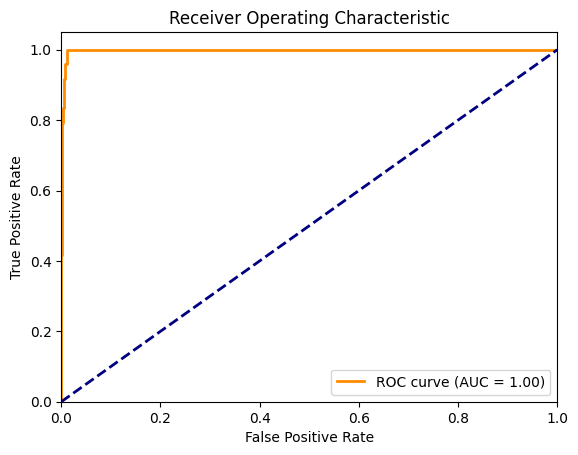

0.9984996249062266


In [139]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Имея истинные метки классов и предсказанные вероятности класса "1":
y_pred_proba = clf.predict_proba(X_test)[:,1]

# Вычислить значения TPR и FPR для построения графика ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Вычислить AUC
auc_score = auc(fpr, tpr)

# Построение графика ROC
def plot_roc(fpr, tpr):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
plot_roc(fpr, tpr)
print(auc_score)

In [154]:
y_true_pred = y_pred[:,1]

y_true_pred = [1 if 2 * x >= auc_score else 0 for x in y_true_pred]
print(classification_report(y_test, y_true_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3999
           1       0.90      0.75      0.82        24

    accuracy                           1.00      4023
   macro avg       0.95      0.87      0.91      4023
weighted avg       1.00      1.00      1.00      4023



In [183]:
# clf.fit(X, y)
y_pred_answer = clf.predict(df_test[new_features_list])

In [184]:
y_pred_answer[:-10]

array([0, 0, 0, ..., 0, 0, 0])

In [185]:
ddd = {'ID': df_test['ID'], 'prediction': y_pred_answer}
final_answer = pd.DataFrame(data=ddd)
final_answer

,ID,prediction
0,1-35972079318,0
1,1-34716644135,0
2,1-35386843231,0
3,1-34839475238,0
4,1-35362151316,0
...,...,...
9995,1-35319560769,0
9996,1-35169489475,0
9997,3-34780356093,0
9998,3-34798051102,0


In [187]:
from pathlib import Path  
filepath = Path('/Users/dimmyt/Documents/PyCharmProjects/N--DS/N! weekly/weekly4/answer.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
final_answer.to_csv(filepath, index=False)  